## Introduction 
Everyday we come across various products in our lives, on the digital medium we swipe across hundreds of product choices under one category. It will be tedious for the customer to make selection. Here comes 'reviews' where customers who have already got that product leave a rating after using them and brief their experience by giving reviews. As we know ratings can be easily sorted and judged whether a product is good or bad. But when it comes to sentence reviews we need to read through every line to make sure the review conveys a positive or negative sense. In the era of artificial intelligence, things like that have got easy with the Natural Langauge Processing(NLP) technology.

**What is sentiment analysis?**  
> Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral.Understanding people’s emotions is essential for businesses since customers are able to express their thoughts and feelings more openly than ever before.It is quite hard for a human to go through each single line and identify the emotion being the user experience.Now with technology, we can automatically analyzing customer feedback, from survey responses to social media conversations, brands are able to listen attentively to their customers, and tailor products and services to meet their needs.   

> Sentiment analysis can be utilized for feedback management system. We Classification of individual comments/reviews.and we also determining overall rating based on individual comments/reviews. So that company can get a complete idea on feedback's provided by customers and can take care on those particular fields. This makes more loyal Customers to the company, increase in business , fame ,brand value ,profits.

# Sentiment Analysis | Amazon reviews

## **Flowchart**
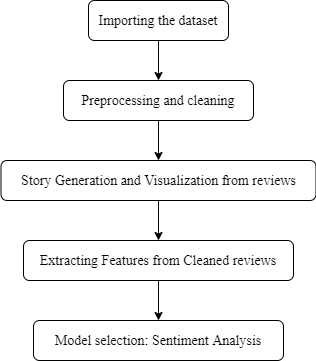

## **1. Import Libraries**
Let's import all necessary libraries for the analysis 

In [ ]:
#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

### **Importing the dataset**

In [ ]:
raw_reviews = pd.read_csv('/content/Musical_instruments_reviews.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


**Dataset Details**

This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time

**Description of columns in the file:**

1. reviewerID - ID of the 
reviewer, e.g. A2SUAM1J3GNN3B
2. asin - ID of the product, e.g. 0000013714
3. reviewerName - name of the reviewer
4. helpful - helpfulness rating of the review, e.g. 2/3
5. reviewText - text of the review
6. overall - rating of the product
7. summary - summary of the review
8. unixReviewTime - time of the review (unix time)
9. reviewTime - time of the review (raw)

In [ ]:
raw_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


---
---
---
---

## **2. Preprocessing and cleaning**
We got to do lot of preprocessing before sending the reviews to the model.

#### Handling NaN values
Let's check for null values

In [ ]:
#Creating a copy
process_reviews=raw_reviews.copy()

#Checking for null values
process_reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [ ]:
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

### Concatenating review text and summary

Let's combine review text and summary column. 

In [ ]:
process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


### Creating 'sentiment' column

This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [ ]:
#Figuring out the distribution of categories
process_reviews['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [ ]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [ ]:
process_reviews['sentiment'].value_counts()

Positive    9022
Neutral      772
Negative     467
Name: sentiment, dtype: int64

### Handling time column

Here we have an review time column which has date and year, once we split both we will split the date further into month and date.

In [ ]:
# new data frame which has date and year
new = process_reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
process_reviews["date"]= new[0] 
  
# making separate year column from new data frame 
process_reviews["year"]= new[1] 

process_reviews=process_reviews.drop(['reviewTime'], axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,sentiment,date,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,02 21,2014


In [ ]:
# Splitting the date 
new1 = process_reviews["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
process_reviews["month"]= new1[0] 
  
# adding day to the main dataset 
process_reviews["day"]= new1[1] 

process_reviews=process_reviews.drop(['date'], axis=1)
process_reviews.head()


,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,sentiment,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21


### Finding the helpfulness of the review

From the main dataframe we can see the helpful feature with values in list [a,b] format. It says that a out of b people found that review helpful. But with that format, it could not add value to the machine learning model and it will be difficult to decrypt the meaning for the machine. So we planned to create helpful_rate feature which returns a/b value from [a,b]. The following codeblock contains the complete processing step.

In [ ]:
# Splitting the dataset based on comma and square bracket 
new1 = process_reviews["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)


# I found few spaces in new3, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
process_reviews['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
process_reviews=process_reviews.drop(['helpful'], axis=1)

In [ ]:
process_reviews.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21,0.00


We have successfully created the helpful_rate column through processing steps. Let's look at the values

In [ ]:
process_reviews['helpful_rate'].value_counts()

0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.30       1
0.47       1
0.69       1
0.10       1
0.43       1
Name: helpful_rate, Length: 65, dtype: int64

0.00 indicates that the review hasn't been much helpful and 1.00 indicates that the review has been very helpful



### Review text-Punctuation Cleaning

Let's begin our text processing by removing the punctuations

In [ ]:
#Removing unnecessary columns
process_reviews=process_reviews.drop(['reviewerName','unixReviewTime'], axis=1)
#Creating a copy 
clean_reviews=process_reviews.copy()

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
process_reviews['reviews']=process_reviews['reviews'].apply(lambda x:review_cleaning(x))
process_reviews.head()

,reviewerID,asin,overall,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,not much to write about here but it does exact...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,the product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,the primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects my mxl mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,this pop filter is great it looks and performs...,Positive,2014,02,21,0.00


We have removed all punctuation in our review column

### Review text-Stop words

Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So we have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [ ]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

,reviewerID,asin,overall,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00


---
---
---
---

## **3. Story Generation and Visualization from reviews**

In this section we will complete do exploratory data analysis on texts as well as other factors to understand what are all features which contributes to the sentiment.

**Prior analysis assumptions:**

1)Higher the helpful rate the sentiment becomes positive

2)There will be many negative sentiment reviews in the 2013 and 2014 year

3)There will be more reviews at the starting of a month

These assumptions will be verified with our plots also we will do text analysis alot.

### Sentiments vs Helpful rate

First lets look whether there any relationship between sentiment of review and helpfulness of it

In [ ]:
pd.DataFrame(process_reviews.groupby('sentiment')['helpful_rate'].mean())

,helpful_rate
sentiment,
Negative,0.307559
Neutral,0.275687
Positive,0.260505


From the table we can see that the mean of of helpful rate is higher for any negative reviews than neutral and positive reviews. These mean value might have been influenced by the 0 values in helpful rates. Lets check how it is distributed through violin plot

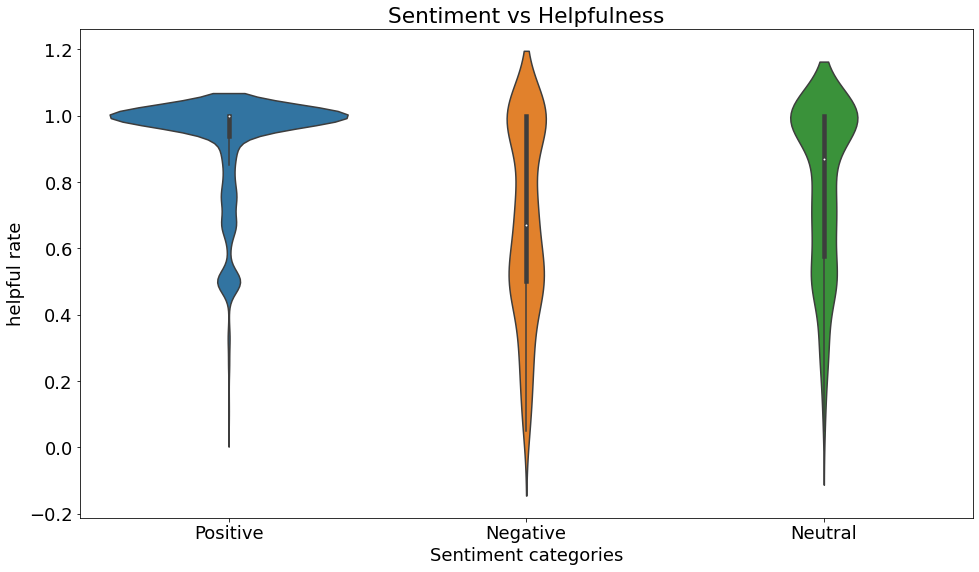

In [ ]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()

Insights:

From the plot we can declare that more number of positive reviews are having high helpful rate. We got deceived by the mean value, it's better to look at a plot rather than taking some measures of central tendency under such situation. Our first assumption is correct.

### Year vs Sentiment count

In this block we will see how many reviews were posted based on sentiments in each year from 2004 to 2014

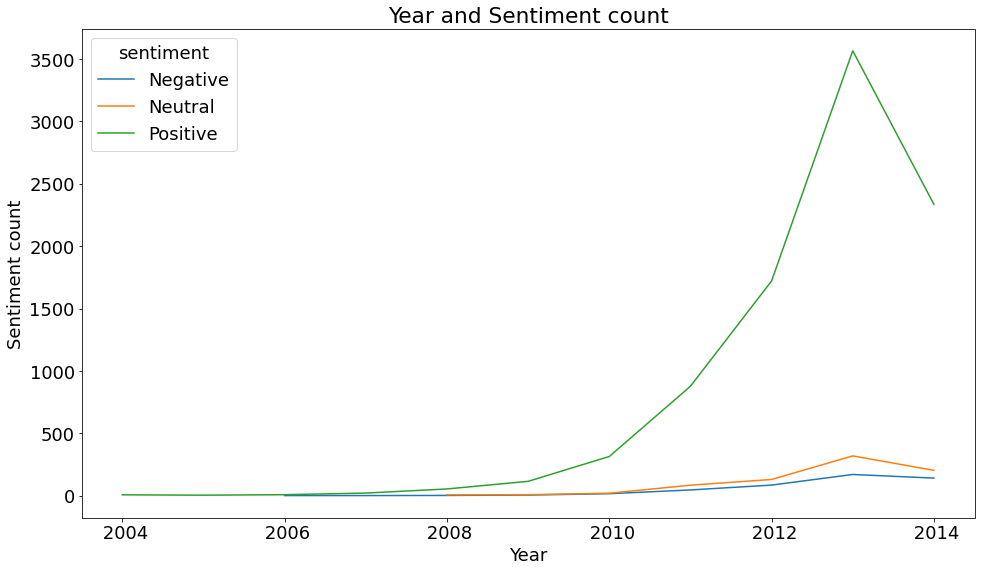

In [ ]:
process_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

Insights:

From the plot we can clearly see the rise in positive reviews from 2010. Reaching its peak around 2013 and there is a dip in 2014, All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews. Our second assumption is wrong.

### Day of month vs Reviews count

Let's check if there are any relationship between reviews and day of month

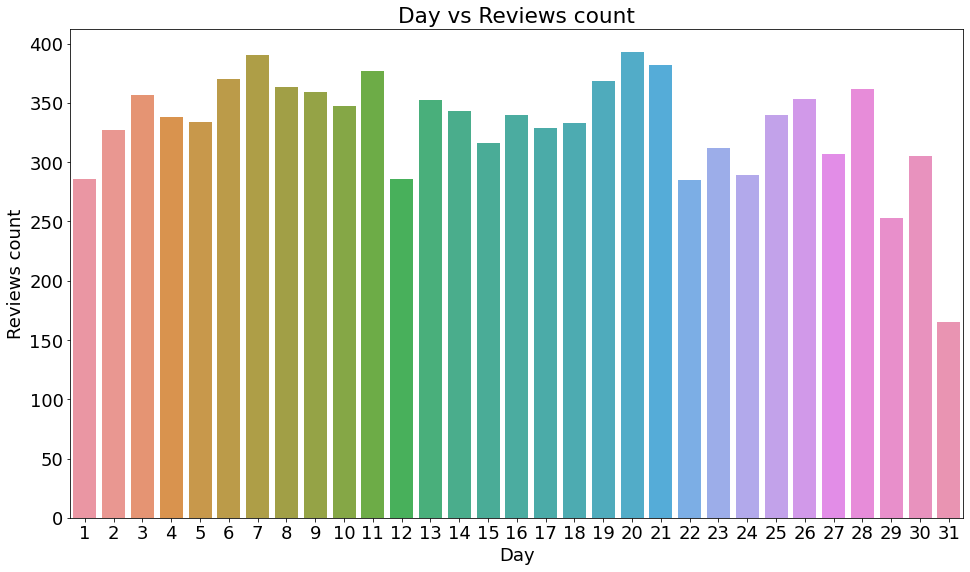

In [ ]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

Insights:

The review counts are more or less uniformly distributed.There isn't much variance between the days. But there is a huge drop at the end of month. Our third assumption is wrong.

### Creating few more features for text analysis

Now, let's create polarity, review length and word count

Polarity: We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review

In [ ]:
process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [ ]:
process_reviews.head()

,reviewerID,asin,overall,reviews,sentiment,year,month,day,helpful_rate,polarity,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00,0.250000,162,25
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93,0.014286,356,55
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,Positive,2013,08,28,1.00,0.167500,315,48
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00,0.333333,169,22
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00,0.800000,136,21


In [ ]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### Sentiment polarity distribution

Let's look at our polarity distribution

TextBlob is another excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores.

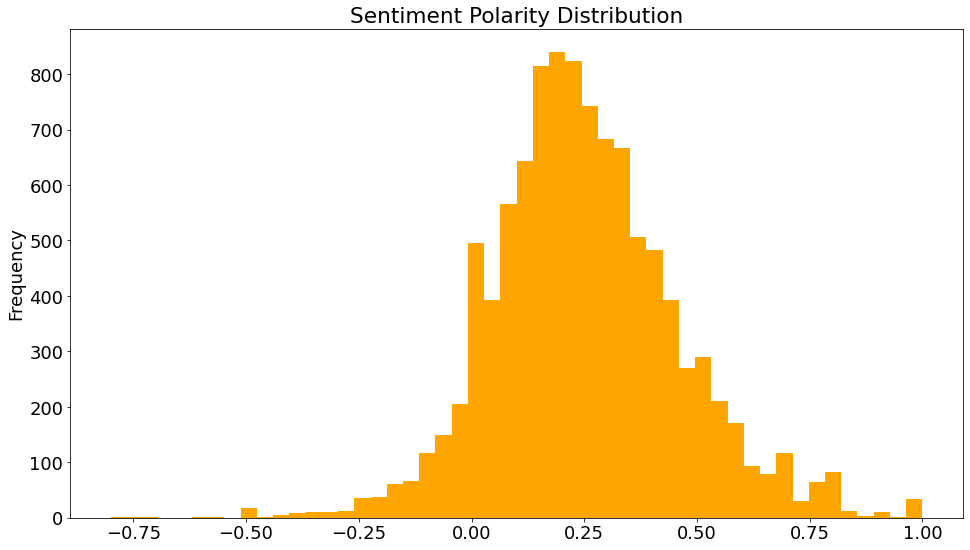

In [ ]:
import plotly.offline as plot
process_reviews['polarity'].plot(
    kind='hist',
    bins=50,
    xlabel='polarity',
    color='orange',
    ylabel='count',
    title='Sentiment Polarity Distribution')

Insights:

We have a lot of positive polarities compared to the negative polarities
This polarity distributions assures the number of positive reviews we had
We can say that this polarity is a normally distributed but not standard normal

### Review Rating Distribution

Let's check out how overall ratings are distributed

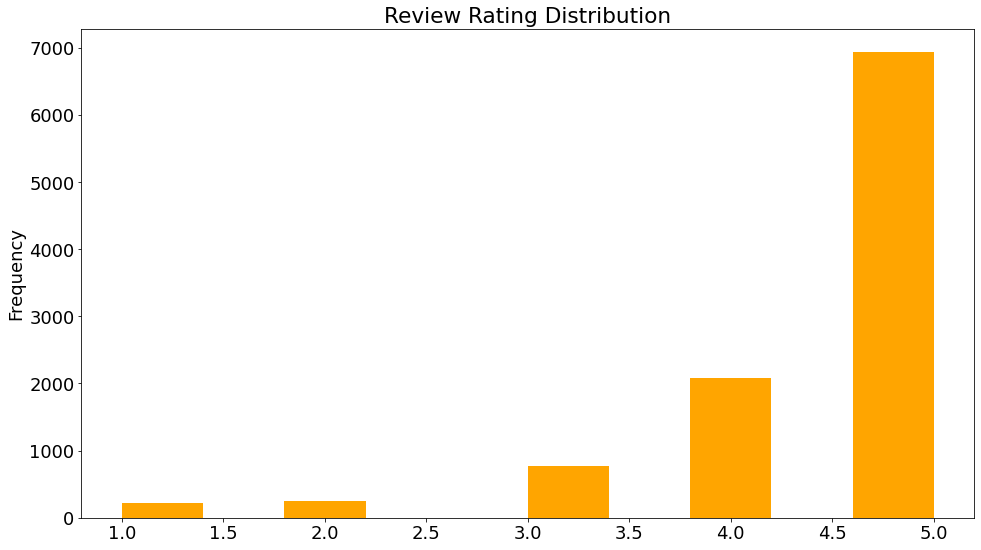

In [ ]:
process_reviews['overall'].plot(
    kind='hist',
    xlabel='rating',
    color='orange',
    ylabel='count',
    title='Review Rating Distribution')

We have a large number of 5 ratings(nearly 7k) followed by 4,3,2,1. It's linear in nature

### Review Text Length Distribution

Let's check out the length of review text

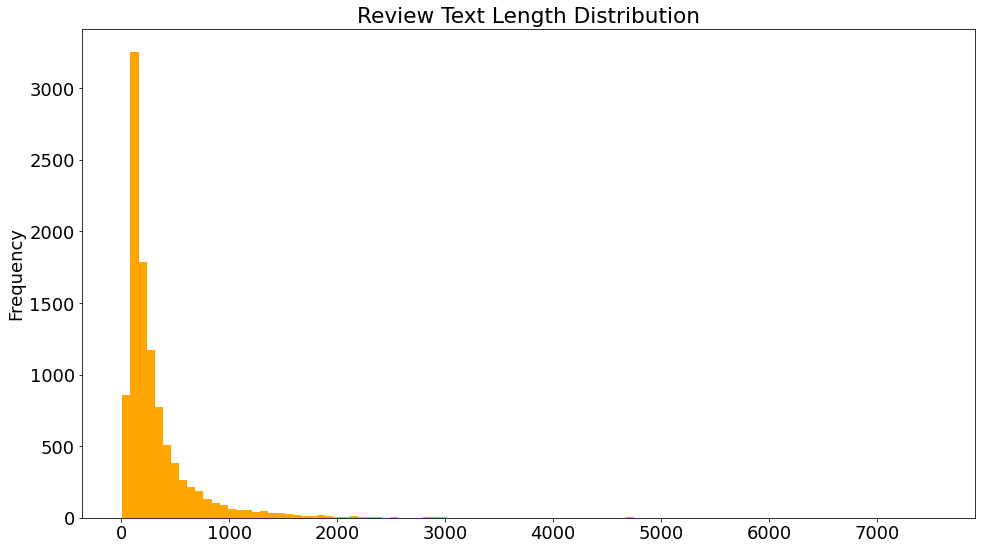

In [ ]:
process_reviews['review_len'].plot(
    kind='hist',
    bins=100,
    xlabel='review length',
    color='orange',
    ylabel='count',
    title='Review Text Length Distribution')

We have a right skewed distribution where most of the lengths falls between 0-1000

### Review Text Word Count Distribution

Let's check out the word count of review text

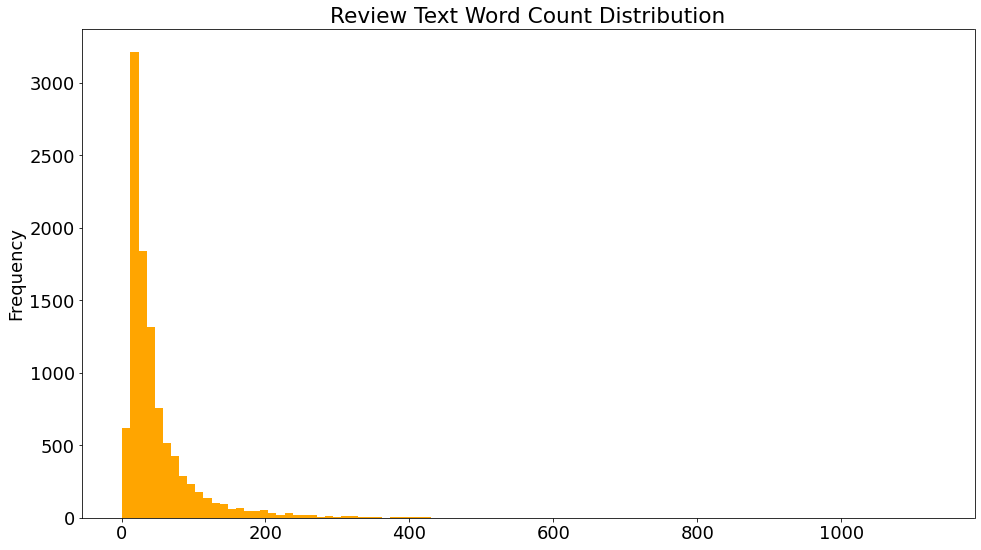

In [ ]:
process_reviews['word_count'].plot(
    kind='hist',
    bins=100,
    xlabel='word count',
    color='orange',
    ylabel='count',
    title='Review Text Word Count Distribution')

We have a right skewed distribution with most of the words falling between 0-200 in a a review

### Wordcloud-Positive reviews

Let's look at the word cloud of positive reviews

In [ ]:
#Filtering data
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

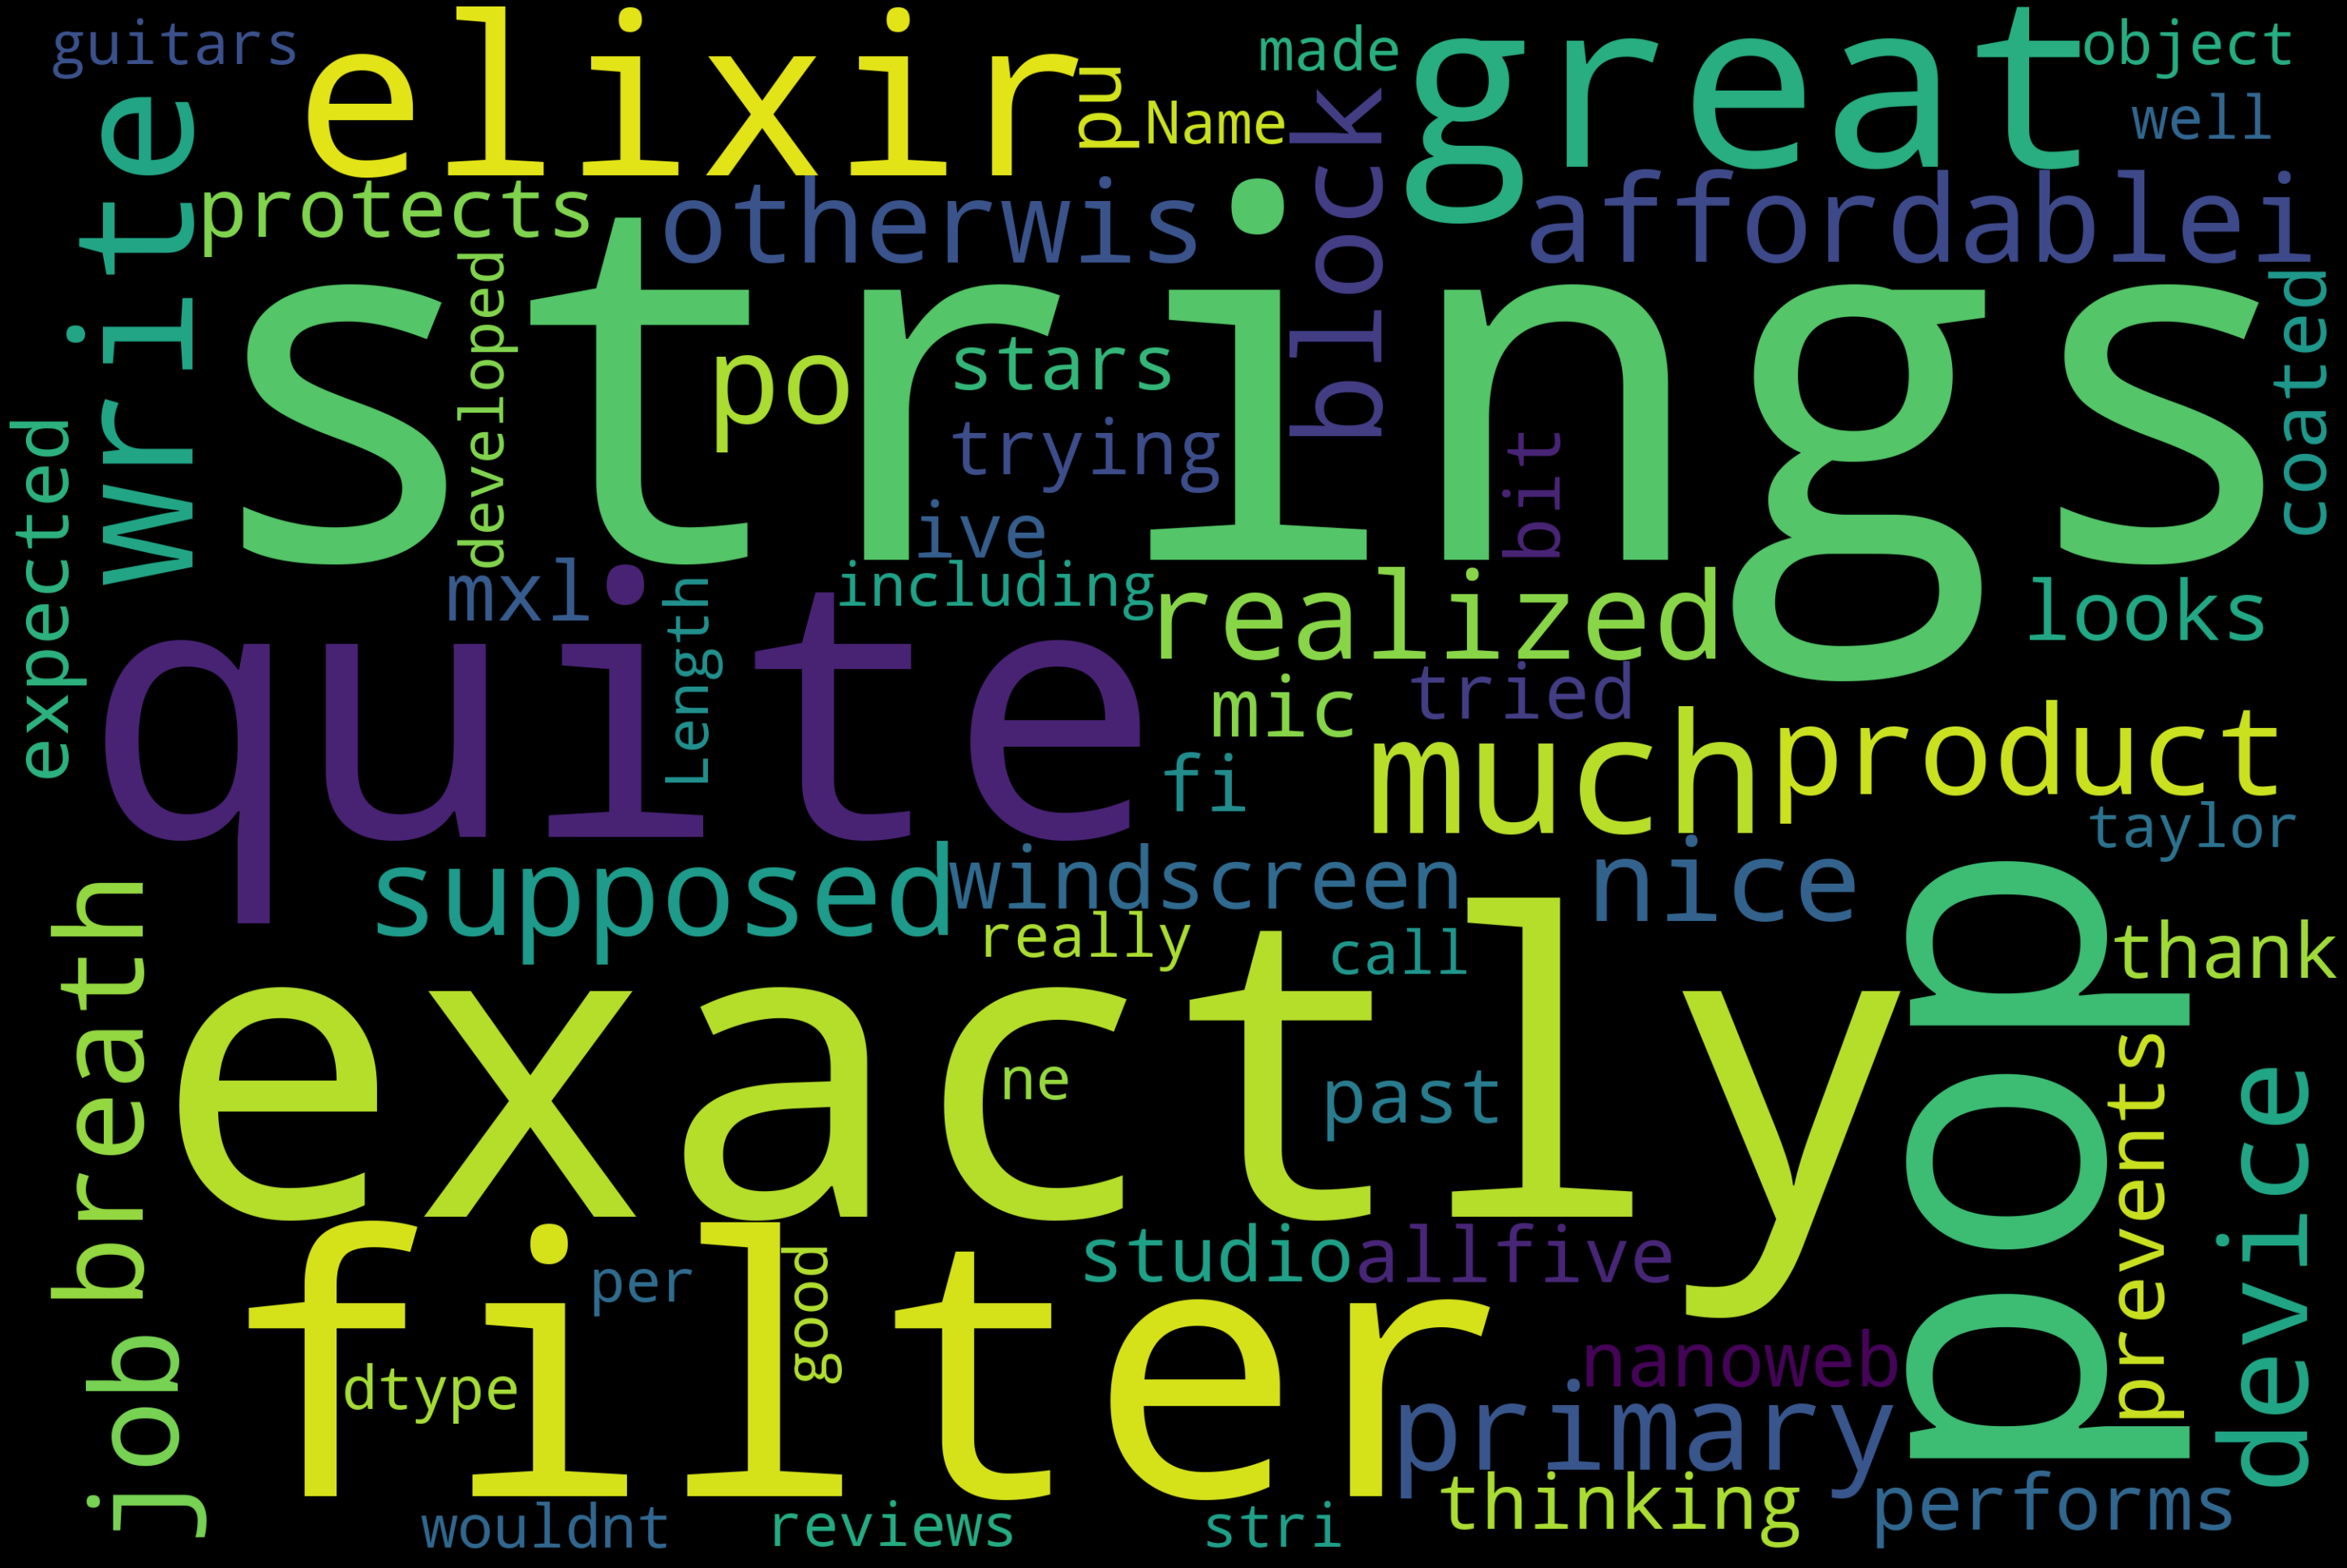

In [ ]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


We can see positive words like great,affordable,expected,exactly etc.,



### Wordcloud-Neutral reviews

Let's look at the word cloud of neutral reviews

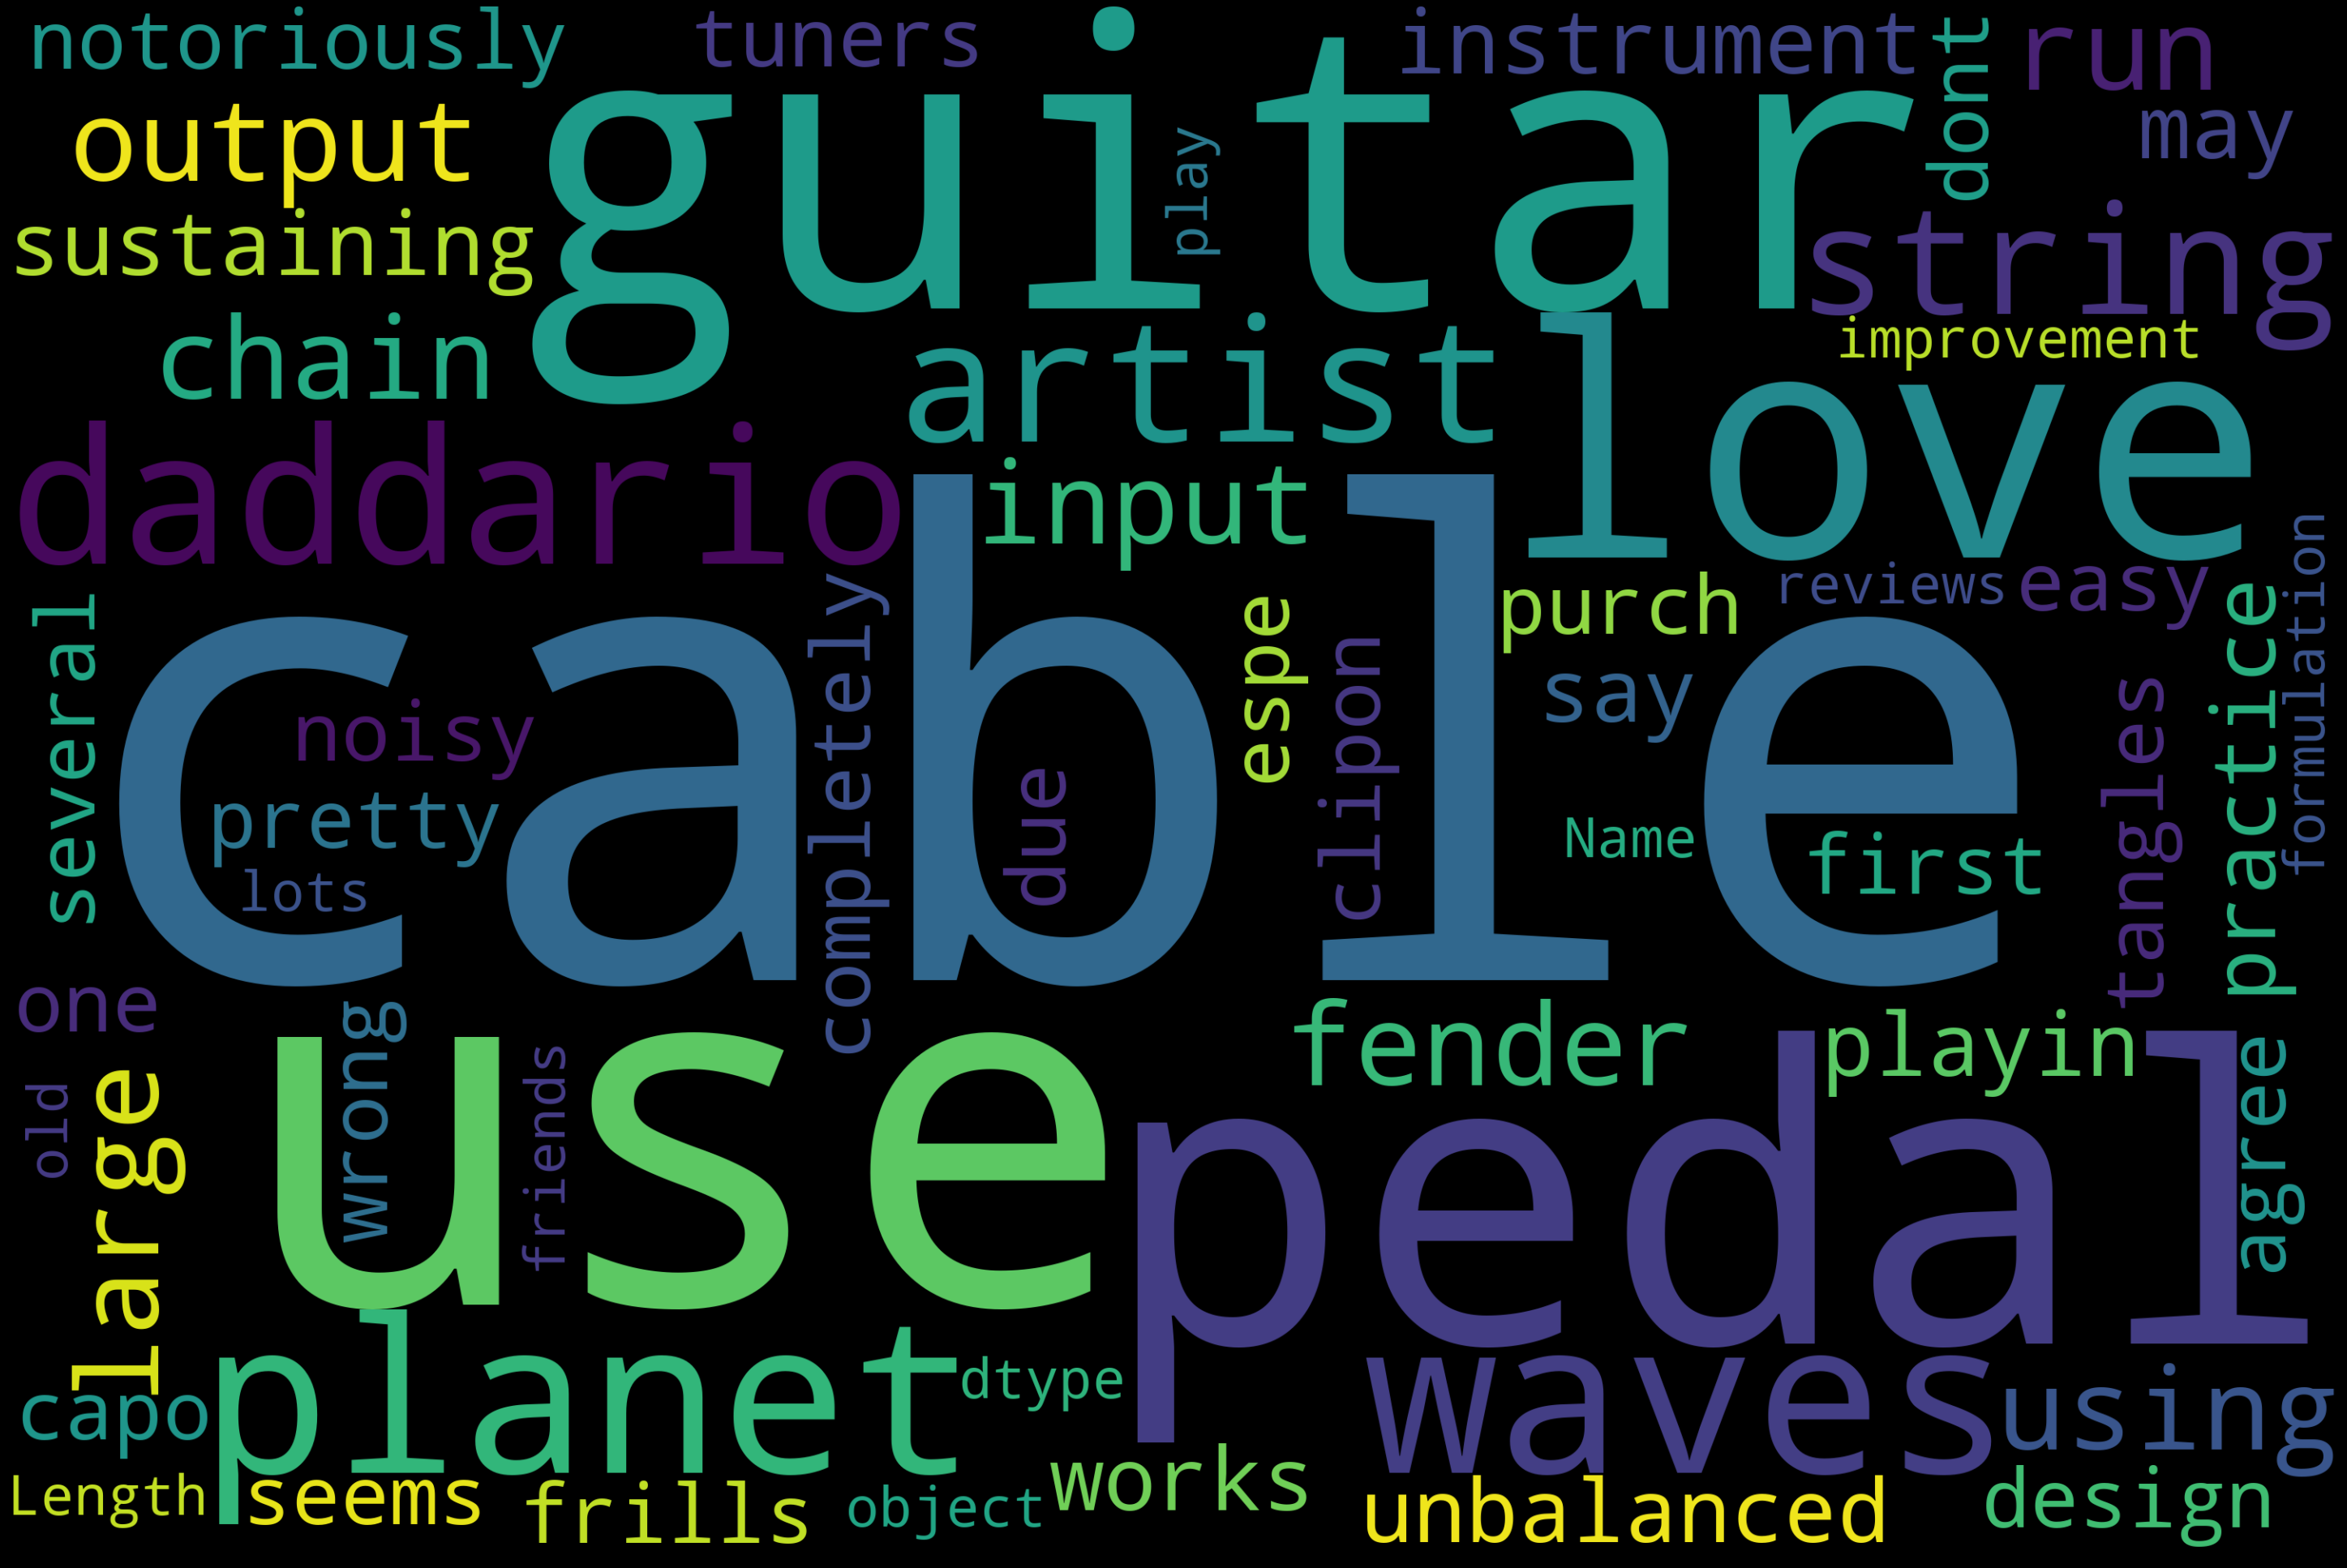

In [ ]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most of the neutral review words are focussed on the products and how can they be improved.

### Wordcloud-Negative reviews

Let's look at the word cloud of negative reviews



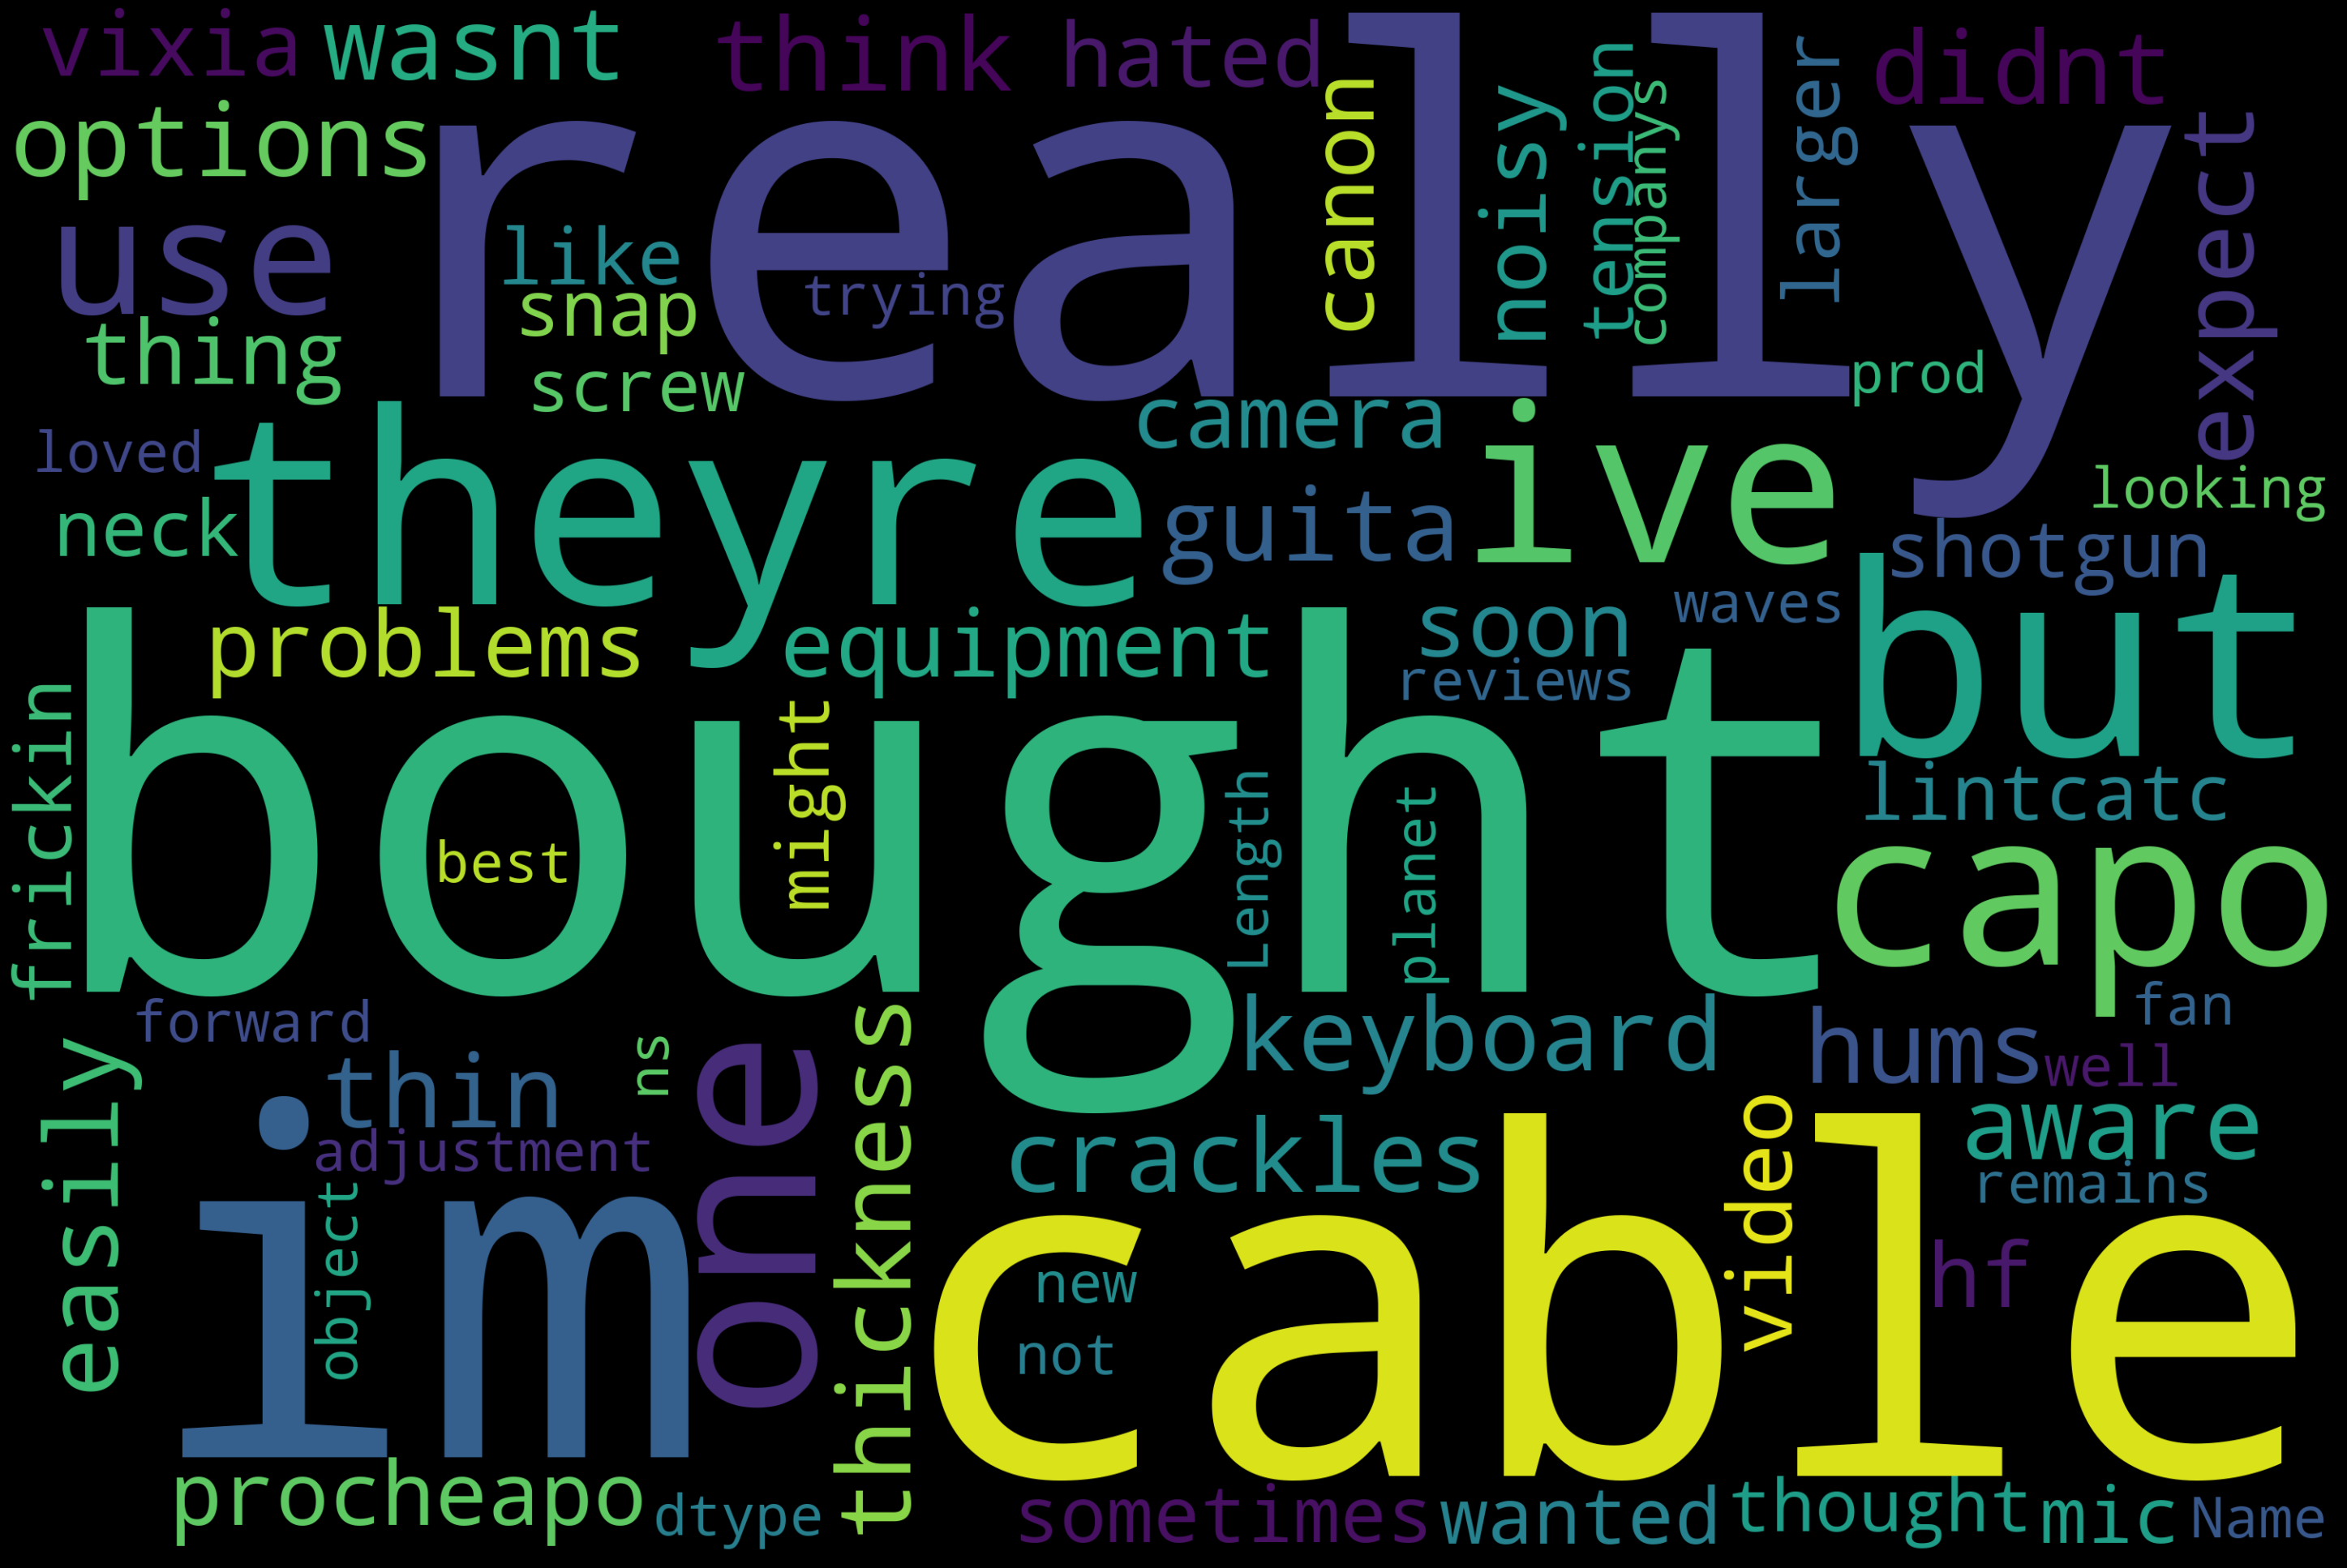

In [ ]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


We can see negative review words such as noisy,didnt,frickin,wasnt,snap,problems,tension etc.,

---
---
---
---

## **4. Extracting Features from Cleaned reviews**

Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts

### Encoding target variable-sentiment

Let's encode our target variable with Label encoder.

In [ ]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment']) 
  
process_reviews['sentiment'].unique() 

array([2, 1, 0])

In [ ]:
process_reviews['sentiment'].value_counts()

2    9022
1     772
0     467
Name: sentiment, dtype: int64

### Stemming the reviews

Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,

1.   Going->go
2.  Finally->fina



In [ ]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

,reviews
0,not much write but exactly supposed filters po...
1,product exactly quite affordablei not realized...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...


In [ ]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)   

In [ ]:
corpus[3]

'nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sagginggood windscreen money'

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF

### TFIDF(Term Frequency — Inverse Document Frequency)

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [ ]:
X.shape

(10261, 5000)

As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.

In [ ]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

### Handling Imbalance target feature-SMOTE

In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situatio. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [ ]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 9022, 1: 772, 0: 467})
Resampled dataset shape Counter({2: 9022, 1: 9022, 0: 9022})


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


As we can see the resampled data has equally distributed classes

### Train-test split(75:25)

Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [ ]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

---
---
---
---

## **5. Model Building: Sentiment Analysis**

As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model selection

First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8810059200798708
Decision Tree Test Accuracy: 0.8152231845436377
KNN Test Accuracy: 0.8689214787482609
SVC Test Accuracy: 0.8795439317757772
Naive Bayes Test Accuracy: 0.8038184420263036


From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 80%. So we went ahead with logistic regression with hyperparameter tuning.

In [ ]:
# save the model to disk
import pickle
filename = 'NLP_finalized_model.sav'
pickle.dump(cv_models, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

### Logistic Regression with Hyperparameter tuning

We use regularization parameter and penality for parameter tuning. let's see which one to plug.

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The mean accuracy of the model is: 0.9405940594059405


In [ ]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


We have got 94% accuracy.But for classification problems we need to get confusion matrix and check f1 score rather than accuracy

### Classification metrics

Here we plot the confusion matrix with ROC and check our f1 score

Confusion matrix, without normalization


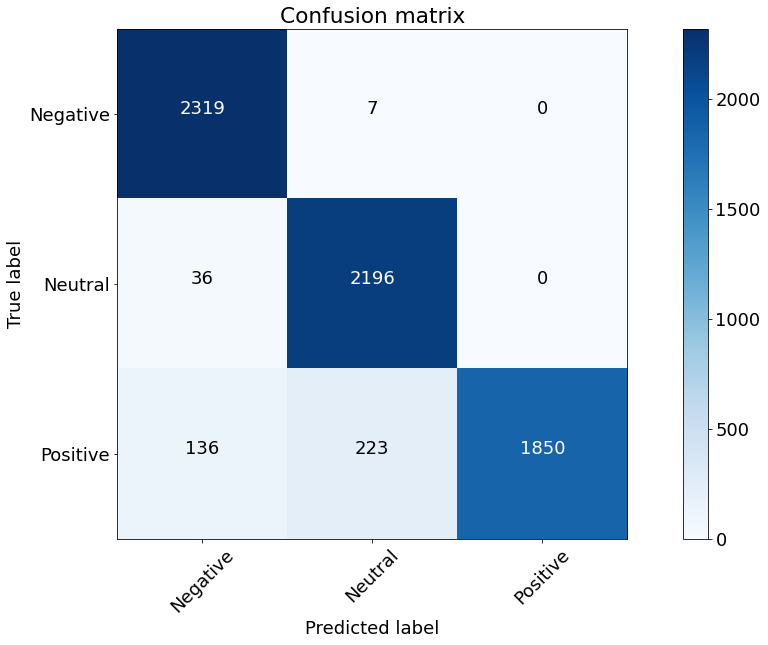

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

Check out the diagonal elements(2326+2195+1854), they are correctly predicted records and rest are incorrectly classified by the algorithm



In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2326
           1       0.91      0.98      0.94      2232
           2       1.00      0.84      0.91      2209

    accuracy                           0.94      6767
   macro avg       0.95      0.94      0.94      6767
weighted avg       0.94      0.94      0.94      6767



Since predicting both positive,negative and neutral reviews are important we are considering.We got a good f1 score. As we see it got a good score across all classes classified.

### ROC-AUC curve

This is a very important curve where we decide on which threshold to setup based upon the objective criteria. Here we plotted ROC for different classes which can help us understand which class was classified better. Also we plot micro and macro averages on the roc curve.



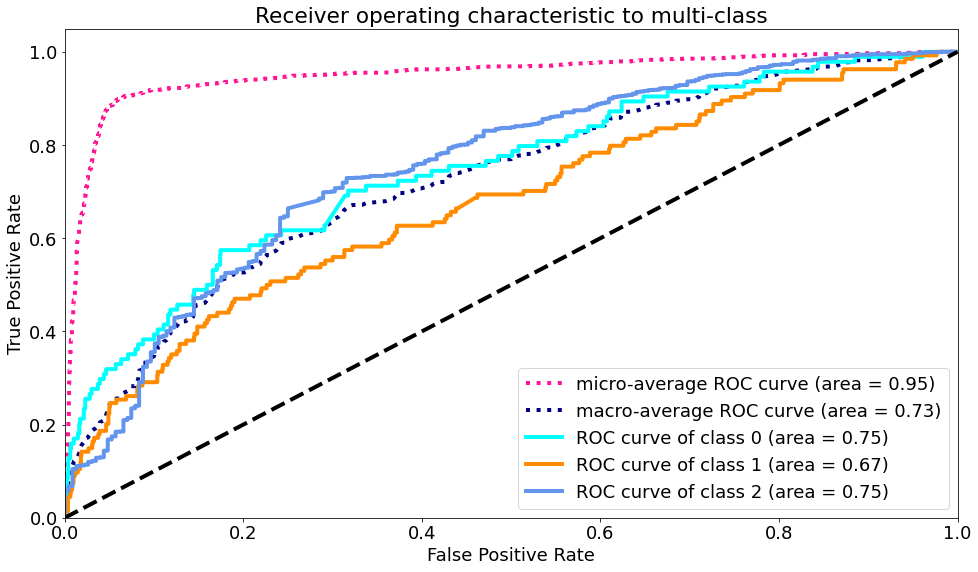

In [ ]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Insights:

1. Considering the ROC curve for classes, class 2 and 0 have been classified pretty well a their area under the curve is high. We can chose any threshold between 0.6-0.8 to get the optimal number of TPR and FPR

2. Coming to micro and macro average, micro average preforms really well and macro average shows a not very good score

3. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance'

### Conclusion

We were able to achieve accuracy of 94% using Logistic Regression with hyperparameter tuning. We tried different simulations using cross validation, training-testing ratio, and different feature extraction processes for comparing varying amounts of data to achieve promising results. 
We have achieved a good accuracy for all the classes starting from splitting the sentiments based on overall score, text cleaning, customizing the stop words list based on requirement and finally handling imbalance with smote.
